# ADS Thesis Project - Explorative Data Visualisation 

**Authors: Marion Späth (2772981)**

This notebook documents the some exploratory analyses that were conducted after the data manipulation.


# Import libraries and Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
import os
import seaborn as sns
from scipy.stats import f_oneway

In [26]:
os.chdir('C:/Users/Marion Späth/Desktop/ADS/Thesis/Data')

df = pd.read_excel("df_filled_for_exploratoy_analyses.xlsx")
df = df.drop(columns=["Unnamed: 0"])
merged_df = pd.read_excel("Merged_df_wide_format.xlsx") # similar dataset but in wide format, note that this is before handling missing values
df.head()

,id,wave,afm_language,age_constant,agric_land,amh_language,educ_recoded_constant,eng_language,expend,irrigated_land,...,number_adults,main_info_source_recoded,religion_recoded,owns_phone,household_moved,purchase_bin,why_not_purchase_recoded,know_vip,trust_vip,advise_vip
0,1,4,No,25.0,Yes,No,Never attended,No,0.0,2.0,...,2,Interpersonal Sources,Traditional/Wakefata,0,No,No,Lack of Awareness or Understanding,Yes,Yes,Yes
1,2,4,Yes,27.0,Yes,No,Adult Education,No,0.0,0.0,...,2,Interpersonal Sources,Traditional/Wakefata,0,No,No,"Financial, Practical, and Situational Constraints",Yes,Yes,Yes
2,3,4,Yes,29.0,No,No,Elementary,No,1.0,NaN,...,2,Professional and Organizational Sources,Christian,0,No,No,"Financial, Practical, and Situational Constraints",Yes,Yes,Yes
3,4,4,No,35.0,Yes,No,Never attended,No,0.0,0.0,...,2,Interpersonal Sources,Traditional/Wakefata,0,No,No,"Financial, Practical, and Situational Constraints",Yes,Yes,Yes
4,5,4,No,36.0,Yes,No,Never attended,No,1.0,2.0,...,2,Interpersonal Sources,Traditional/Wakefata,0,No,No,Lack of Awareness or Understanding,Yes,Yes,Yes


## Change of IBLI Purchase and Welfare Across Waves

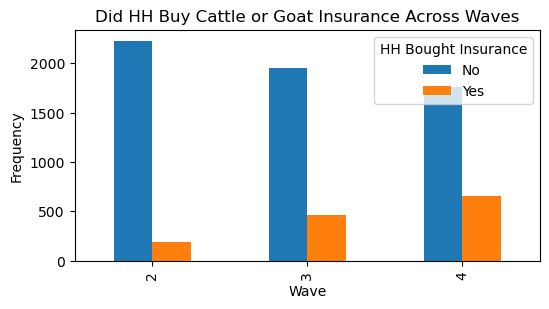

In [7]:
counts = pd.crosstab(df['wave'], df['purchase_bin'], dropna=False)

counts.plot(kind='bar', figsize=(6, 3))
plt.xlabel("Wave")
plt.ylabel("Frequency")
plt.title("Did HH Buy Cattle or Goat Insurance Across Waves")
plt.legend(title="HH Bought Insurance")
plt.show()


The number of households buying an insurance increased over time.

In more detail:

In [9]:
merged_df["change_in_takeup"] = np.where(((merged_df['purchase_bin_r2']=="Yes" )& (merged_df['purchase_bin_r3']=="Yes") & (merged_df['purchase_bin_r4']=="Yes")) | 
                                         ((merged_df['purchase_bin_r2']=="No" ) & (merged_df['purchase_bin_r3']=="No") & (merged_df['purchase_bin_r4']=="No") ), 1 ,0)

merged_df["change_in_takeup"].value_counts()#[1]

print("Number of households which either ALWAYS or NEVER buy IBLI:", merged_df["change_in_takeup"].value_counts()[1], "--> roughly 60% of the sample NEVER BUYS")
print("Number of households which either take up IBLI or stop at least once:", merged_df["change_in_takeup"].value_counts()[0])

Number of households which either ALWAYS or NEVER buy IBLI: 1489 --> roughly 60% of the sample NEVER BUYS
Number of households which either take up IBLI or stop at least once: 927


Different patterns of IBLI purchase:

In [10]:
cols = ['purchase_bin_r2', 'purchase_bin_r3', 'purchase_bin_r4']
merged_df['takeup_pattern'] = merged_df[cols].replace({1: "Yes", 0: "No"}).agg('-'.join, axis=1)
print(merged_df['takeup_pattern'].value_counts())

takeup_pattern
No-No-No       1438
No-No-Yes       404
No-Yes-No       226
No-Yes-Yes      159
Yes-No-No        63
Yes-Yes-Yes      51
Yes-No-Yes       45
Yes-Yes-No       30
Name: count, dtype: int64


In [12]:
cols = ['buy_cattle_r2', 'buy_cattle_r3', 'buy_cattle_r4']
merged_df['takeup_pattern'] = merged_df[cols].replace({1: "Yes", 0: "No"}).agg('-'.join, axis=1)
print(merged_df['takeup_pattern'].value_counts())

takeup_pattern
Not buy-Not buy-Not buy    1787
Not buy-Buy-Not buy         420
Buy-Buy-Buy                 112
Buy-Not buy-Buy              82
Buy-Buy-Not buy              12
Buy-Not buy-Not buy           2
Not buy-Not buy-Buy           1
Name: count, dtype: int64


### Plot welfare over time:

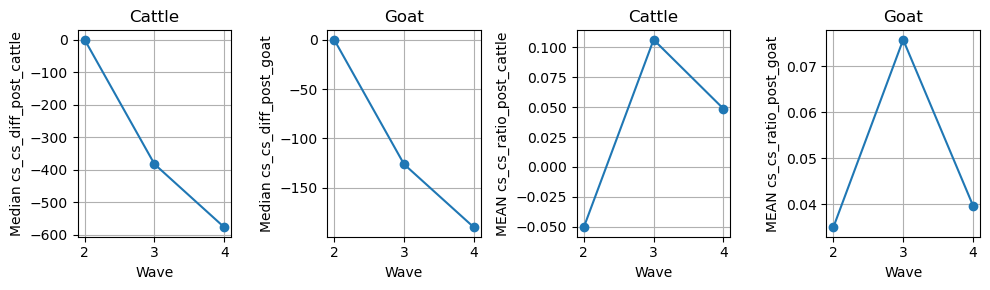

In [ ]:
# Compute medians
means_cattle = df.groupby('wave')['cs_cs_diff_post_cattle'].median()
means_goat = df.groupby('wave')['cs_cs_diff_post_goat'].median()
means_cattle2 = df.groupby('wave')['cs_cs_ratio_post_cattle'].mean()
means_goat2 = df.groupby('wave')['cs_cs_ratio_post_goat'].mean()

# Create side-by-side plots
fig, axes = plt.subplots(ncols=4, figsize=(10, 3), sharey=False)

# Plot for cattle DIFFERENCE
axes[0].plot(means_cattle.index.astype(str), means_cattle.values, marker='o', linestyle='-')
axes[0].set_xlabel("Wave")
axes[0].set_ylabel("Median cs_cs_diff_post_cattle")
axes[0].set_title("Cattle")
axes[0].grid(True)

# Plot for goat DIFFERENCE
axes[1].plot(means_goat.index.astype(str), means_goat.values, marker='o', linestyle='-')
axes[1].set_xlabel("Wave")
axes[1].set_ylabel("Median cs_cs_diff_post_goat")
axes[1].set_title("Goat")
axes[1].grid(True)

# Plot for cattle RATIO
axes[2].plot(means_cattle2.index.astype(str), means_cattle2.values, marker='o', linestyle='-')
axes[2].set_xlabel("Wave")
axes[2].set_ylabel("MEAN cs_cs_ratio_post_cattle")
axes[2].set_title("Cattle")
axes[2].grid(True)

# Plot for goat RATIO
axes[3].plot(means_goat2.index.astype(str), means_goat2.values, marker='o', linestyle='-')
axes[3].set_xlabel("Wave")
axes[3].set_ylabel("MEAN cs_cs_ratio_post_goat")
axes[3].set_title("Goat")
axes[3].grid(True)

plt.tight_layout()
plt.show()


# Correlation Analysis

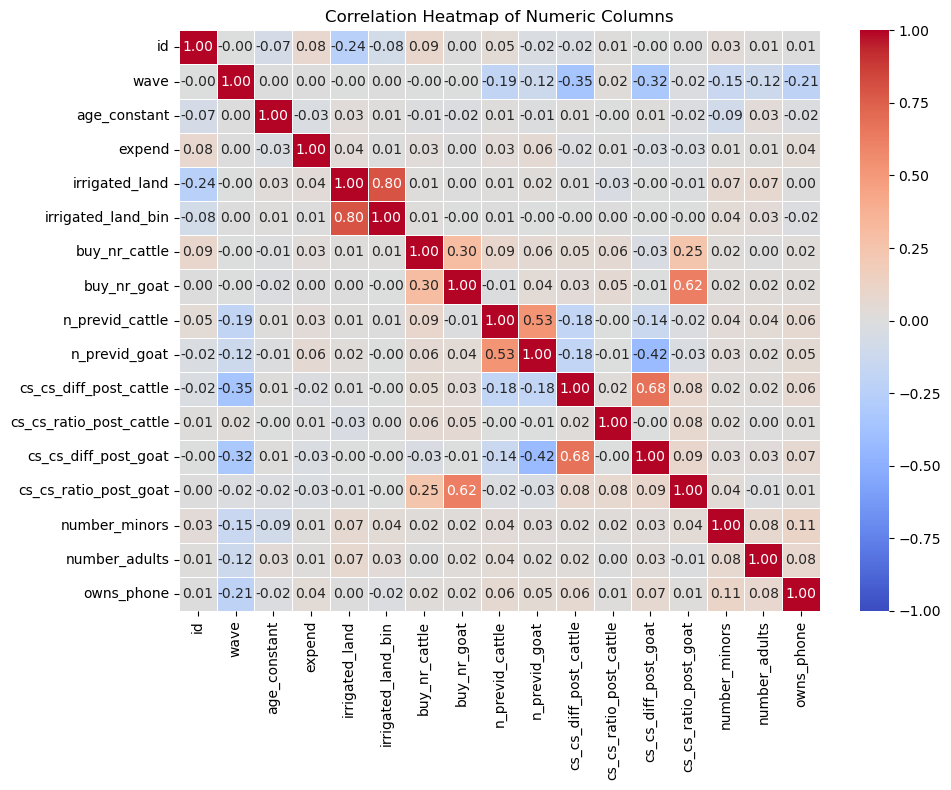

In [32]:
# Select numeric columns and compute correlations
numeric_cols = df.select_dtypes(include='number')
corr_matrix = numeric_cols.corr()

# Plot with diverging colormap and fixed scale
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',   # diverging colormap
    fmt=".2f",
    linewidths=0.5,
    vmin=-1, vmax=1
)
plt.title("Correlation Heatmap of Numeric Columns")
plt.tight_layout()
plt.show()

# T-Tests and Bar Charts for Categorical variables

In [34]:
def compare_groups(df, group_var, outcome_var, group_labels=('Group 0', 'Group 1'), do_plot=True, do_print=True):
    """
    Perform Welch's t-test and optionally print and plot results.

    Parameters:
    - df: pandas DataFrame containing the data.
    - group_var: column name (string) used to define the groups.
    - outcome_var: column name (string) of the outcome variable.
    - group_labels: tuple with labels for the two groups (default ('Group 0', 'Group 1')).
    - do_plot: whether to show the plot (default True).
    - do_print: whether to print statistics (default True).

    Returns:
    - Dictionary with t-statistic, p-value, means, and mean difference.
    """
    
    # Define groups
    group_values = df[group_var].dropna().unique()
    if len(group_values) != 2:
        raise ValueError("Grouping variable must have exactly two unique non-NA values.")
    
    group0 = df[df[group_var] == group_values[0]][outcome_var].dropna()
    group1 = df[df[group_var] == group_values[1]][outcome_var].dropna()
    
    # Compute mean difference
    mean_diff = group1.mean() - group0.mean()
    
    # Perform Welch's t-test
    t_stat, p_value = stats.ttest_ind(group0, group1, equal_var=False)
    
    # Output dictionary
    output = {
        't_statistic': t_stat,
        'p_value': p_value,
        'mean_group0': group0.mean(),
        'mean_group1': group1.mean(),
        'mean_difference': mean_diff,
        'group0_label': group_values[0],
        'group1_label': group_values[1]
    }
    
    # Only print if requested
    if do_print:
        print(f"T-statistic: {t_stat:.3f}")
        print(f"P-value: {p_value:.3f}")
        print(f"Average {group_labels[0]} ({group_values[0]}): {group0.mean():.3f}")
        print(f"Average {group_labels[1]} ({group_values[1]}): {group1.mean():.3f}")
        print(f"Difference ({group_labels[1]} - {group_labels[0]}): {mean_diff:.3f}")

    # Only plot if requested
    if do_plot:
        mean_values = df.groupby(group_var)[outcome_var].mean().loc[group_values]
        plt.figure(figsize=(6, 4))
        plt.bar(group_labels, mean_values, edgecolor='black')
        plt.ylabel(outcome_var)
        plt.title('Group Comparison')
        plt.tight_layout()
        plt.show()
    
    return output


Print only variables with significant t-tests:


Significant result for household_moved (p = 0.000)

T-statistic: -7.166
P-value: 0.000
Average No (No): -221.232
Average Yes (Yes): -131.546
Difference (Yes - No): 89.686


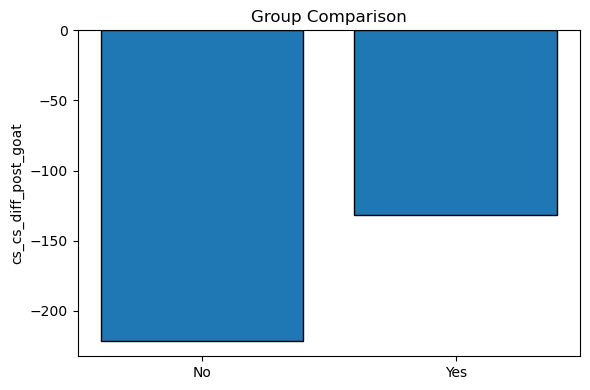


Significant result for purchase_bin (p = 0.000)

T-statistic: 4.889
P-value: 0.000
Average No (No): -195.514
Average Yes (Yes): -280.183
Difference (Yes - No): -84.669


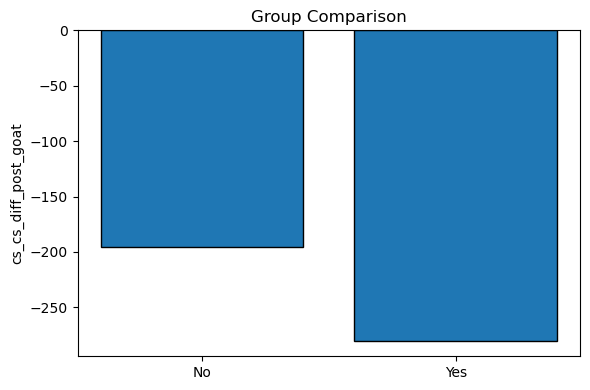


Significant result for know_vip (p = 0.000)

T-statistic: -5.226
P-value: 0.000
Average Yes (Yes): -216.171
Average No (No): -141.838
Difference (No - Yes): 74.333


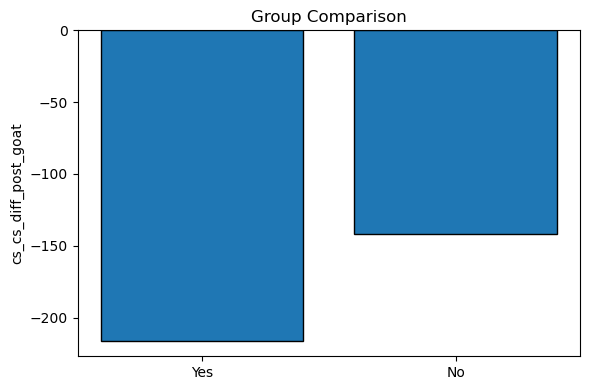


Significant result for trust_vip (p = 0.000)

T-statistic: -6.749
P-value: 0.000
Average Yes (Yes): -220.184
Average No (No): -122.283
Difference (No - Yes): 97.900


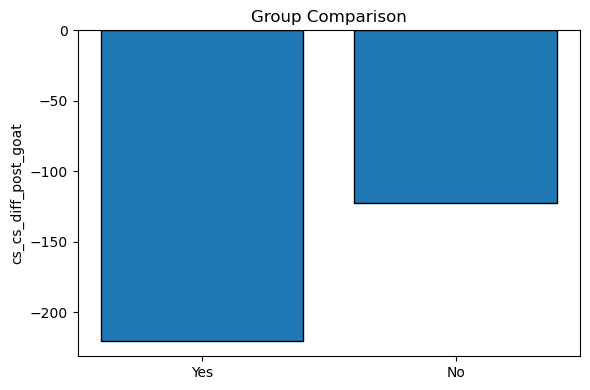


Significant result for advise_vip (p = 0.000)

T-statistic: -13.546
P-value: 0.000
Average Yes (Yes): -374.652
Average No (No): -157.815
Difference (No - Yes): 216.836


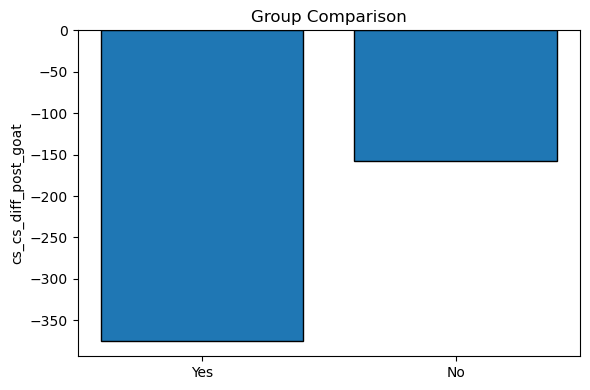

In [35]:
# Identify binary categorical variables
binary_categoricals = [col for col in df.select_dtypes(include=['object', 'category']).columns
                       if df[col].dropna().nunique() == 2]

# Loop and apply
results = {}

for cat_var in binary_categoricals:
    # First, run without printing or plotting
    output = compare_groups(df=df, group_var=cat_var, outcome_var='cs_cs_diff_post_goat', group_labels=tuple(df[cat_var].dropna().unique()), do_print=False, do_plot=False)
    
    # Then, only print and plot if p-value < 0.05
    if output['p_value'] < 0.05:
        print(f"\nSignificant result for {cat_var} (p = {output['p_value']:.3f})\n")
        
        # Now call again to actually print and plot
        compare_groups(df=df, group_var=cat_var, outcome_var='cs_cs_diff_post_goat', group_labels=(output['group0_label'], output['group1_label']), do_print=True, do_plot=True)
        
        results[cat_var] = output


## ANOVA for variables with >2 categories

Print only variables with significant results:

In [42]:
def run_anova_on_multi_categoricals(df, outcome_var, alpha=0.05):
    """
    Perform ANOVA on categorical variables with more than 2 categories
    against a specified outcome variable.
    
    Parameters:
    - df: DataFrame containing the data
    - outcome_var: string, name of the numeric outcome variable
    - alpha: significance level (default = 0.05)
    
    Returns:
    - results: dict with significant variables and their ANOVA stats
    """
    # Find variables with more than 2 categories
    multi_categoricals = [
        col for col in df.select_dtypes(include=['object', 'category']).columns
        if df[col].dropna().nunique() > 2
    ]

    results = {}

    for cat_var in multi_categoricals:
        groups = [
            df[df[cat_var] == val][outcome_var].dropna()
            for val in df[cat_var].dropna().unique()
        ]

        # Only run ANOVA if all groups have data
        if all(len(g) > 0 for g in groups):
            f_stat, p_value = f_oneway(*groups)

            if p_value < alpha:
                print(f"\nSignificant ANOVA result for {cat_var} (p = {p_value:.3f})")

                # Plot group means
                mean_values = df.groupby(cat_var)[outcome_var].mean()
                plt.figure(figsize=(8, 4))
                plt.barh(mean_values.index.astype(str), mean_values.values, edgecolor='black')
                plt.xlabel(outcome_var)
                plt.title(f'Group Comparison: {cat_var}')
                plt.tight_layout()
                plt.show()

                results[cat_var] = {'f_statistic': f_stat, 'p_value': p_value}

    return results

## Goat

Difference:


Significant ANOVA result for household_description (p = 0.000)


C:\Users\Marion Späth\AppData\Local\Temp\ipykernel_34888\4131414690.py:41: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


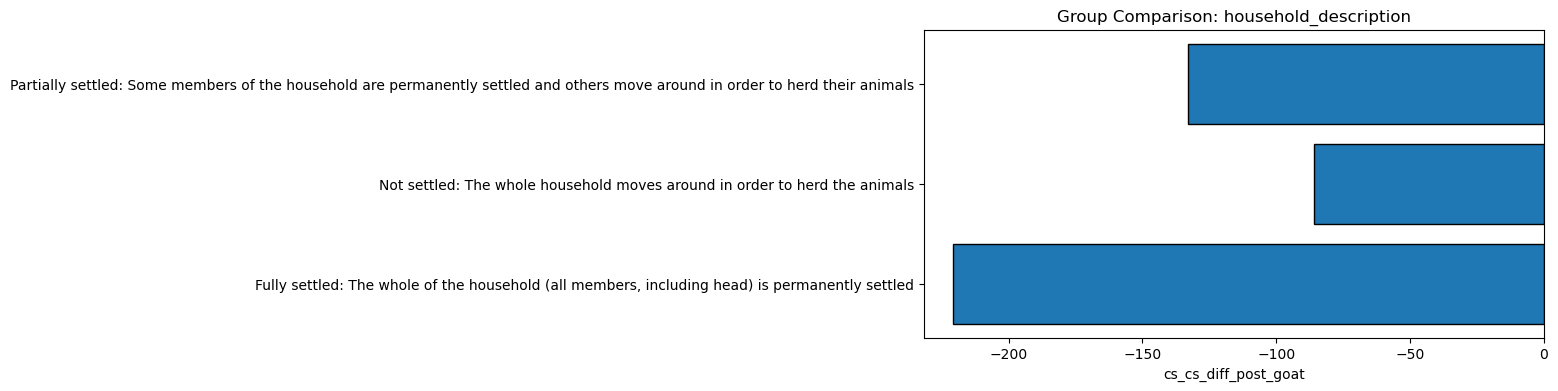


Significant ANOVA result for main_info_source_recoded (p = 0.000)


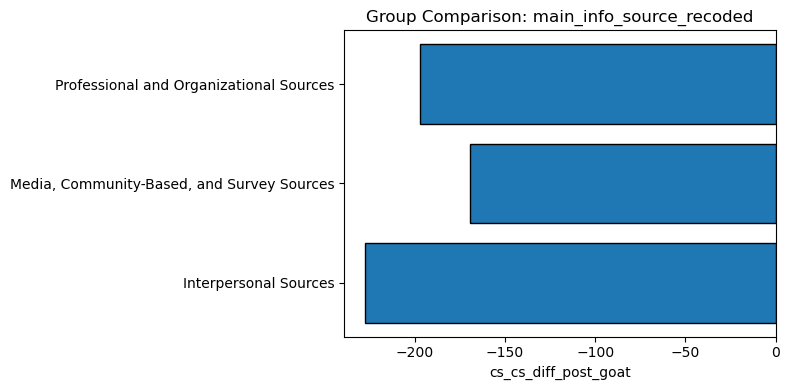


Significant ANOVA result for why_not_purchase_recoded (p = 0.000)


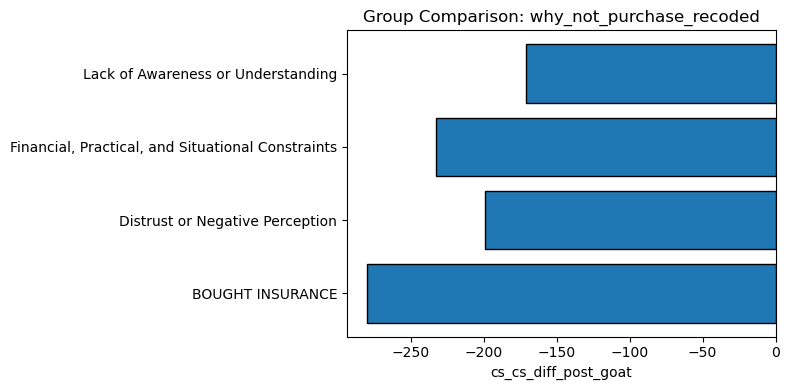

{'household_description': {'f_statistic': 14.991690560461988,
  'p_value': 3.199376640921288e-07},
 'main_info_source_recoded': {'f_statistic': 8.08283715301624,
  'p_value': 0.00031209705962167566},
 'why_not_purchase_recoded': {'f_statistic': 20.67533471721816,
  'p_value': 2.5226818873832407e-13}}

In [43]:
run_anova_on_multi_categoricals(df, 'cs_cs_diff_post_goat')

Ratio:


Significant ANOVA result for main_info_source_recoded (p = 0.000)


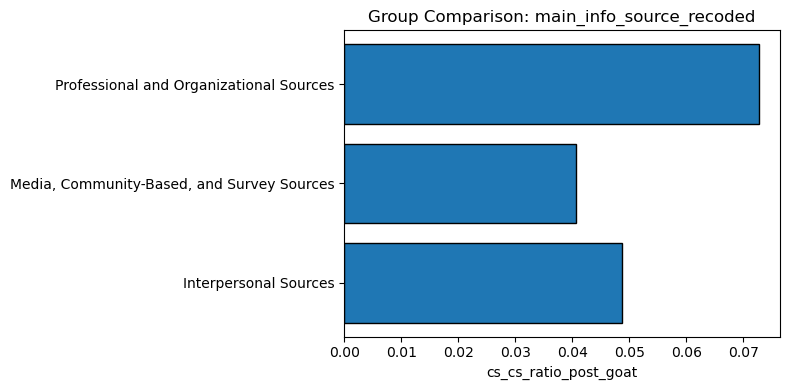


Significant ANOVA result for religion_recoded (p = 0.022)


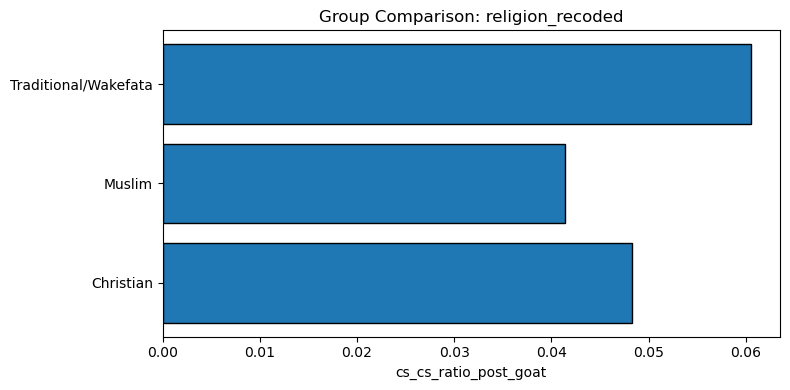


Significant ANOVA result for why_not_purchase_recoded (p = 0.000)


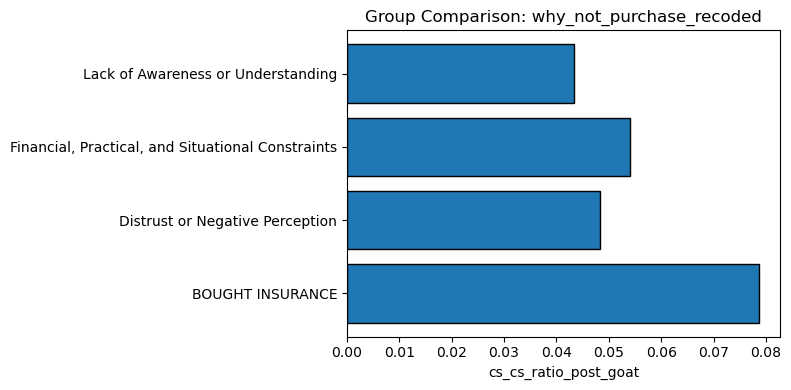

{'main_info_source_recoded': {'f_statistic': 7.74868363606197,
  'p_value': 0.00043714466566768676},
 'religion_recoded': {'f_statistic': 3.842495161453877,
  'p_value': 0.021511178731987178},
 'why_not_purchase_recoded': {'f_statistic': 6.675425271470492,
  'p_value': 0.00017107115592677983}}

In [44]:
run_anova_on_multi_categoricals(df, 'cs_cs_ratio_post_goat')

## Cattle

Difference:


Significant ANOVA result for household_description (p = 0.000)


C:\Users\Marion Späth\AppData\Local\Temp\ipykernel_34888\4131414690.py:41: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


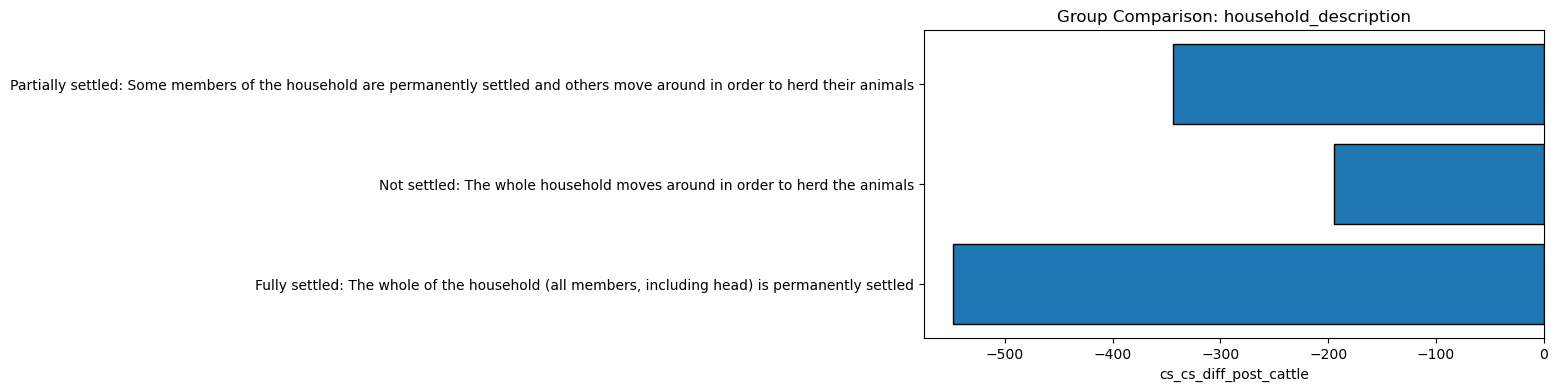


Significant ANOVA result for main_info_source_recoded (p = 0.000)


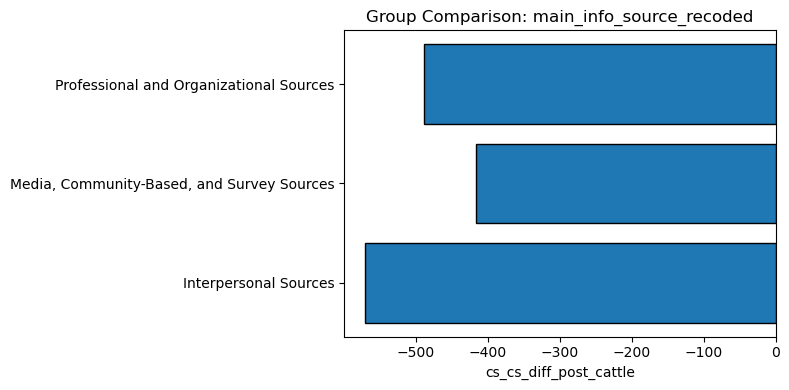


Significant ANOVA result for why_not_purchase_recoded (p = 0.000)


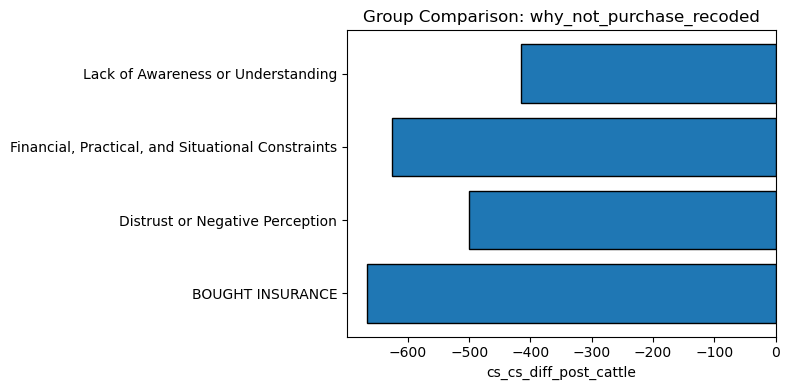

{'household_description': {'f_statistic': 14.180848415251189,
  'p_value': 7.182579499553187e-07},
 'main_info_source_recoded': {'f_statistic': 9.187705582692258,
  'p_value': 0.00010377926928931311},
 'why_not_purchase_recoded': {'f_statistic': 22.531181457289666,
  'p_value': 1.6884929714764342e-14}}

In [45]:
run_anova_on_multi_categoricals(df, 'cs_cs_diff_post_cattle')

Ratio:


Significant ANOVA result for educ_recoded_constant (p = 0.005)


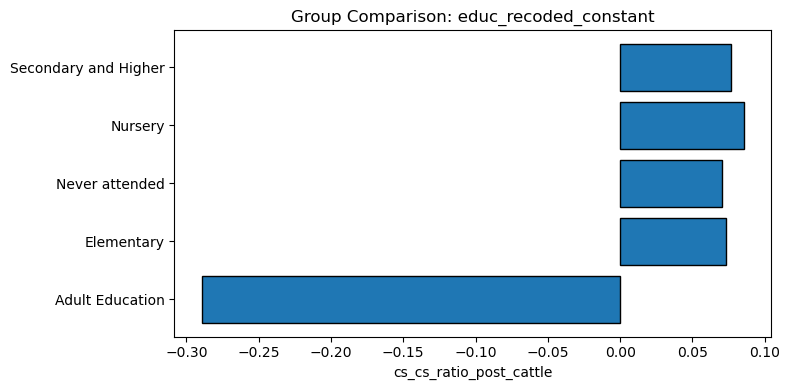

{'educ_recoded_constant': {'f_statistic': 3.772455231829651,
  'p_value': 0.004565682810708981}}

In [46]:
run_anova_on_multi_categoricals(df, 'cs_cs_ratio_post_cattle')

## Create Summary Statistics Table for Data Chapter / Appendix

In [51]:
goat_df = pd.read_excel("goat_df.xlsx")
goat_df = goat_df.drop(columns=["Unnamed: 0", "id"])

cattle_df = pd.read_excel("cattle_df.xlsx")
cattle_df = cattle_df.drop(columns=["Unnamed: 0", "id"])
cattle_df.head(2)

,wave,afm_language,age_constant,agric_land,amh_language,educ_recoded_constant,eng_language,expend,irrigated_land_bin,buy_cattle,...,main_info_source_recoded,religion_recoded,owns_phone,household_moved,purchase_bin,why_not_purchase_recoded,know_vip,trust_vip,advise_vip,ratio_insured_cattle
0,4,No,25,Yes,No,Never attended,No,0,1,Not buy,...,Interpersonal Sources,Traditional/Wakefata,0,No,No,Lack of Awareness or Understanding,Yes,Yes,Yes,0.0
1,4,Yes,27,Yes,No,Adult Education,No,0,0,Not buy,...,Interpersonal Sources,Traditional/Wakefata,0,No,No,"Financial, Practical, and Situational Constraints",Yes,Yes,Yes,0.0


The function below creates a summary table of numeric and categorical variables from a DataFrame and saves it as a formatted Excel file. It is applied to both the cattle and goat dataset.

In [ ]:
def summarize_to_excel(df, filename="summary_statistics.xlsx", sheet_name="Summary"):
    """
    Creates a summary table of numeric and categorical variables from a DataFrame
    and saves it as a formatted Excel file.

    Parameters:
    - df: pandas DataFrame
    - filename: output Excel filename (default: 'summary_statistics.xlsx')
    - sheet_name: name of the Excel sheet (default: 'Summary')
    """
    summary = []

    for col in df.columns:
        col_data = df[col].dropna()

        if pd.api.types.is_numeric_dtype(col_data):
            summary.append({
                'Variable': col,
                'Categories': '',
                'Range': f"{round(col_data.min(), 2)}–{round(col_data.max(), 2)}",
                'Mean / Rel. Freq.': round(col_data.mean(), 2),
                'Std Dev': round(col_data.std(), 2)
            })

        elif pd.api.types.is_categorical_dtype(col_data) or col_data.dtype == object:
            category_counts = col_data.value_counts(normalize=True)
            for cat, freq in category_counts.items():
                summary.append({
                    'Variable': col,
                    'Categories': str(cat),
                    'Range': f"{col_data.min()}–{col_data.max()}",
                    'Mean / Rel. Freq.': round(freq, 2),
                    'Std Dev': ''
                })

    # Create DataFrame and save to Excel
    summary_df = pd.DataFrame(summary)
    summary_df.to_excel(filename, index=False, sheet_name=sheet_name, engine='openpyxl')

    print(f"Summary statistics saved to '{filename}' in sheet '{sheet_name}'.")

Summary statistics saved to 'cattle_summary.xlsx' in sheet 'Summary'.


C:\Users\Marion Späth\AppData\Local\Temp\ipykernel_34888\2689713166.py:27: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(col_data) or col_data.dtype == object:
C:\Users\Marion Späth\AppData\Local\Temp\ipykernel_34888\2689713166.py:27: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(col_data) or col_data.dtype == object:
C:\Users\Marion Späth\AppData\Local\Temp\ipykernel_34888\2689713166.py:27: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(col_data) or col_data.dtype == object:
C:\Users\Marion Späth\AppData\Local\Temp\ipykernel_34888\2689713166.py:27: DeprecationWarning:

Apply function:

In [ ]:
summarize_to_excel(cattle_df, "cattle_summary.xlsx")

In [80]:
summarize_to_excel(goat_df, "goat_summary.xlsx")

Summary statistics saved to 'goat_summary.xlsx' in sheet 'Summary'.


C:\Users\Marion Späth\AppData\Local\Temp\ipykernel_34888\2689713166.py:27: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(col_data) or col_data.dtype == object:
C:\Users\Marion Späth\AppData\Local\Temp\ipykernel_34888\2689713166.py:27: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(col_data) or col_data.dtype == object:
C:\Users\Marion Späth\AppData\Local\Temp\ipykernel_34888\2689713166.py:27: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(col_data) or col_data.dtype == object:
C:\Users\Marion Späth\AppData\Local\Temp\ipykernel_34888\2689713166.py:27: DeprecationWarning: